# Import libraries 

In [2]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Read data 

In [3]:
train = pd.read_csv('Datasets/Train.csv')
test = pd.read_csv('Datasets/Test.csv')
ss = pd.read_csv('Datasets/SampleSubmission.csv')
variable_def = pd.read_csv('Datasets/VariableDefinitions.csv')

#### Submission by class distribution

In [6]:
y = train.target

0    10624
1     1455
Name: target, dtype: int64


<AxesSubplot:xlabel='target', ylabel='count'>

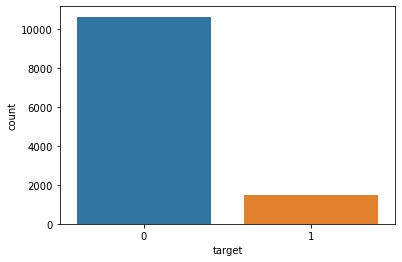

In [7]:
print(y.value_counts())


sns.countplot(y)

In [8]:
y.value_counts().index[0]

0

In [9]:
distrib_sub = ss.copy()

In [10]:
distrib_sub.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [11]:
distrib_sub['target'] = y.value_counts().index[0]

In [12]:
distrib_sub.to_csv('umoja_subzero.csv', index= False)

# Simple EDA

In [13]:
variable_def

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


In [14]:
print('Train shape:',train.shape,'\nTest shape:', test.shape, '\nsamplesubmission shape:',ss.shape)

Train shape: (12079, 14) 
Test shape: (5177, 13) 
samplesubmission shape: (5177, 2)


# Since the ratio of categorical variables to numerical variable is high, consider combining both train and test for easy preproccessing 

In [15]:
# join train and test together
ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (17256, 14)


In [16]:
all_data.tail()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
17251,ZYXX5AF,2010-07-18,2011-07-17,Male,48,2010-07-18,1,Saloon,NaN,Honda,NaN,NaN,CarSafe,NaN
17252,ZYYOZ5L,2010-12-04,2011-12-03,NaN,50,2010-12-04,1,NaN,NaN,NaN,Victoria Island,Lagos,Car Classic,NaN
17253,ZZ1GTKD,2010-09-24,2011-09-23,Male,1,2010-09-24,1,NaN,NaN,NaN,NaN,NaN,CarSafe,NaN
17254,ZZDXQSI,2010-07-17,2011-07-16,Female,52,2010-07-17,1,Saloon,Grey,TOYOTA,NaN,NaN,Car Classic,NaN
17255,ZZYTLV1,2010-07-17,2011-07-16,Male,68,2010-07-17,1,Saloon,NaN,Peugeot,NaN,NaN,CarSafe,NaN


In [17]:
date_col = ['Policy Start Date','Policy End Date','First Transaction Date']
num_col = ['Age']
cat_col = [col for col in test.columns if col not in date_col+num_col]
cat_col

['ID',
 'Gender',
 'No_Pol',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [18]:
cat_col.remove('ID')

The dataset is is skewed towards class 0, consider balancing the dataset 

In [19]:
print("Are There Missing value in train? :",train.isnull().any().any())
print((train.isnull().sum()/train.shape[0])*100)

Are There Missing value in train? : True
ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     2.972100
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              30.946270
Subject_Car_Colour        57.637222
Subject_Car_Make          20.498386
LGA_Name                  53.613710
State                     53.713056
ProductName                0.000000
target                     0.000000
dtype: float64


In [20]:
print("Are There Missing value in test? :",test.isnull().any().any())
print((test.isnull().sum()/test.shape[0])*100)

Are There Missing value in test? : True
ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     3.013328
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              31.639946
Subject_Car_Colour        58.045200
Subject_Car_Make          20.494495
LGA_Name                  53.737686
State                     53.853583
ProductName                0.000000
dtype: float64


Remember to handle the missing values 

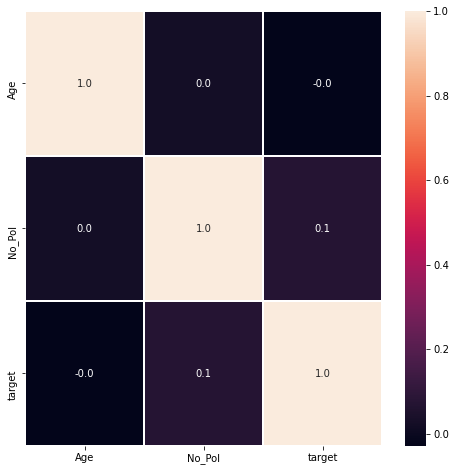

In [21]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(all_data.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

### Correlation might not be a best measure for this dataset since there are more categorical features

In [22]:
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0


In [23]:
all_data.Gender.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', nan, 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

# Basic Data preprocessing 

### fill mising value

In [24]:
miss = ['Car_Category', 'Subject_Car_Make','Subject_Car_Colour' ,'LGA_Name', 'State', 'Gender']

for column in miss:
    all_data[column] = all_data[column].fillna('Missing')

In [25]:
all_data = all_data.fillna(9999)
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Missing,Missing,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Missing,Missing,Missing,Missing,Missing,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,Missing,Missing,Missing,Lagos,Lagos,Muuve,1.0


In [26]:
print("Are There still Missing value in data? :",all_data.isnull().any().any())
print((all_data.isnull().sum()/all_data.shape[0])*100)

Are There still Missing value in data? : False
ID                        0.0
Policy Start Date         0.0
Policy End Date           0.0
Gender                    0.0
Age                       0.0
First Transaction Date    0.0
No_Pol                    0.0
Car_Category              0.0
Subject_Car_Colour        0.0
Subject_Car_Make          0.0
LGA_Name                  0.0
State                     0.0
ProductName               0.0
target                    0.0
dtype: float64


### date features

In [27]:
date_col

['Policy Start Date', 'Policy End Date', 'First Transaction Date']

In [28]:
for feat in date_col:
    all_data[feat] = pd.to_datetime(all_data[feat])

In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17256 entries, 0 to 17255
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      17256 non-null  object        
 1   Policy Start Date       17256 non-null  datetime64[ns]
 2   Policy End Date         17256 non-null  datetime64[ns]
 3   Gender                  17256 non-null  object        
 4   Age                     17256 non-null  int64         
 5   First Transaction Date  17256 non-null  datetime64[ns]
 6   No_Pol                  17256 non-null  int64         
 7   Car_Category            17256 non-null  object        
 8   Subject_Car_Colour      17256 non-null  object        
 9   Subject_Car_Make        17256 non-null  object        
 10  LGA_Name                17256 non-null  object        
 11  State                   17256 non-null  object        
 12  ProductName             17256 non-null  object

In [30]:
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Missing,Missing,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Missing,Missing,Missing,Missing,Missing,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,Missing,Missing,Missing,Lagos,Lagos,Muuve,1.0


In [31]:
def extract_date_info(df,cols,):
    for feat in cols:
        df[feat +'_year'] = df[feat].dt.year
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat +'_quarter'] = df[feat].dt.quarter
    df.drop(columns=date_col,axis=1,inplace=True)

In [32]:
all_data['Policy_duration'] = (all_data['Policy End Date'] - all_data['Policy Start Date']).dt.days

all_data['Transaction_from_Policy_Start'] = (all_data['Policy End Date'] - all_data['First Transaction Date']).dt.days

In [33]:
extract_date_info(all_data,date_col)

In [34]:
pd.set_option('display.max_columns', None)
all_data.head()

,ID,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy_duration,Transaction_from_Policy_Start,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter,First Transaction Date_year,First Transaction Date_day,First Transaction Date_month,First Transaction Date_quarter
0,0040R73,Male,30,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,0.0,364,364,2010,14,5,2,2011,13,5,2,2010,14,5,2
1,0046BNK,Female,79,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,1.0,364,364,2010,29,11,4,2011,28,11,4,2010,29,11,4
2,005QMC3,Male,43,1,Saloon,Red,TOYOTA,Missing,Missing,Car Classic,0.0,364,364,2010,21,3,1,2011,20,3,1,2010,21,3,1
3,0079OHW,Male,2,1,Missing,Missing,Missing,Missing,Missing,CarSafe,0.0,364,364,2010,21,8,3,2011,20,8,3,2010,21,8,3
4,00BRP63,Entity,20,3,Missing,Missing,Missing,Lagos,Lagos,Muuve,1.0,124,124,2010,29,8,3,2010,31,12,4,2010,29,8,3


In [35]:
all_data.Gender.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', 'Missing', 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

In [36]:
mapper = {"Male":"M","Female":'F','Entity':'O','Joint Gender':'O',9999:'O','NO GENDER':'O','NOT STATED':'O','SEX':'O' }

In [37]:
all_data.Gender = all_data.Gender.map(mapper)

In [38]:

all_data.Gender = all_data.Gender.fillna('Missing')

all_data.Gender.unique()


array(['M', 'F', 'O', 'Missing'], dtype=object)

#### Dropping Features and some feature Selection

In [39]:
all_data.target = all_data.target.astype(int)

In [40]:
y= all_data['target'][:ntrain]
all_data.drop(columns=['ID', 'target'],inplace=True)                     

In [41]:
categorical_feat = ['Gender', 'Age', 'No_Pol', 'Car_Category', 'Subject_Car_Colour',
       'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName', 'Policy Start Date_year', 'Policy End Date_year', 'First Transaction Date_year']

In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data = all_data.copy()

for i in categorical_feat:
    try:
        all_data[i] = encoder.fit_transform(all_data[i])
    except:
        print(i)

In [43]:
all_data.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Policy_duration,Transaction_from_Policy_Start,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter,First Transaction Date_year,First Transaction Date_day,First Transaction Date_month,First Transaction Date_quarter
0,1,39,0,9,4,69,175,75,1,364,364,7,14,5,2,1,13,5,2,7,14,5,2
1,0,88,0,2,26,69,175,75,1,364,364,7,29,11,4,1,28,11,4,7,29,11,4
2,1,52,0,9,33,69,175,75,1,364,364,7,21,3,1,1,20,3,1,7,21,3,1
3,1,11,0,5,30,51,175,75,5,364,364,7,21,8,3,1,20,8,3,7,21,8,3
4,3,29,2,5,30,51,165,74,8,124,124,7,29,8,3,0,31,12,4,7,29,8,3


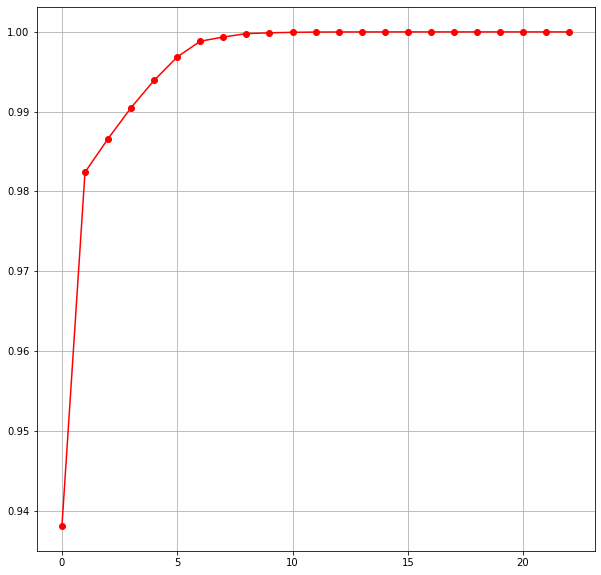

In [44]:
from sklearn.decomposition import PCA

pca = PCA()
data_pca = pca.fit_transform(all_data)

plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [45]:
pca_new = PCA(n_components = 17)
all_data = pca_new.fit_transform(data_pca)

In [46]:
#Get the new dataset
train_n = all_data[:ntrain]
test_n = all_data[ntrain:]

In [47]:
X= train_n

In [48]:
print(X.shape)
print(test_n.shape)

(12079, 17)
(5177, 17)


## Model for Submission

In [49]:
X_trainval = pd.DataFrame(X)
y_train = y
X_test = pd.DataFrame(test_n)

In [50]:
%%capture

from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score




kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 287)
prediction = []
valid = []

contribcat = np.zeros(len(X_test))

i = 1

for train_index, test_index in kf.split(X_trainval, y_train):
    train, val = X_trainval.iloc[train_index], X_trainval.iloc[test_index]
    label, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Trainin models
    clf = CatBoostClassifier(random_state = 42,n_estimators=2000,depth = 8, learning_rate = 0.05, l2_leaf_reg = 50)
    clf.fit(train, label, verbose = 100)
    val_pred = clf.predict(val)
    print('Score for test ', i, end = ': ')
    
    score = f1_score(y_val, val_pred)
    valid.append(score)

    pred = clf.predict(X_test)
    prediction.append(pred)
    
    contribcat += pred/kf.n_splits
    
    
    i+=1
    



In [51]:
print('\nValidation scores for CatBoostClassifier: ', valid, '\nAverage score of: \t', np.mean(valid))


Validation scores for CatBoostClassifier:  [0.22040816326530613, 0.1883408071748879, 0.19444444444444445, 0.20192307692307693, 0.20853080568720378, 0.1388888888888889, 0.17511520737327188, 0.14678899082568808, 0.11059907834101382, 0.22707423580786024] 
Average score of: 	 0.1812113698731642


# Creating submission file

In [802]:
ss.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [87]:
sub_file = ss.copy()

In [64]:
from collections import Counter
Counter(contribcat.round())

Counter({1.0: 371, 0.0: 4806})

In [98]:

sub_file.target = contribcat.round()
sub_file.to_csv('umoja_sub.csv',index=False)
contribcat

array([0.9, 0.9, 0. , ..., 0. , 0. , 0. ])